In [8]:
# 1 cài đặt thư viện
!pip install imageio
!pip install scipy
!pip install scikit-image

In [9]:
# 2.1 nạp ảnh sử dụng thư viện PIL
from google.colab import files
uploaded = files.upload()

from PIL import Image
img = Image.open("bird.png")
img.show()


Saving bird.png to bird.png


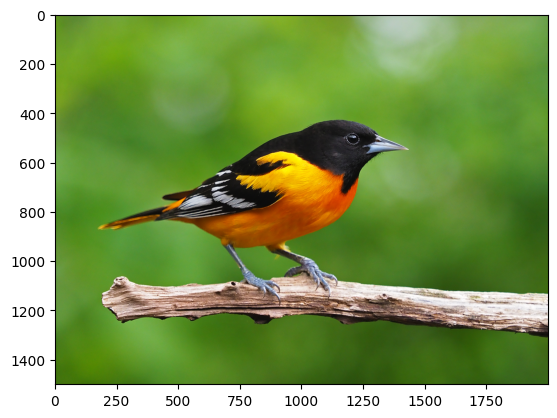

In [10]:
# 2.2 nạp ảnh sử dụng thư viện imageio
import numpy as numpy
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

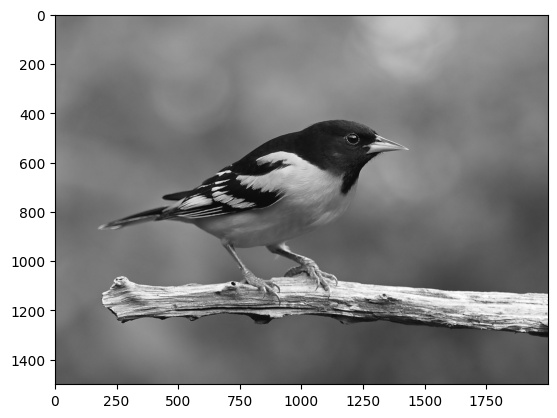

In [11]:
# 2.3 nạp ảnh màu và chuyển sang ảnh grayscale
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('bird.png', mode='L')
plt.imshow(data, cmap='gray')
plt.show()

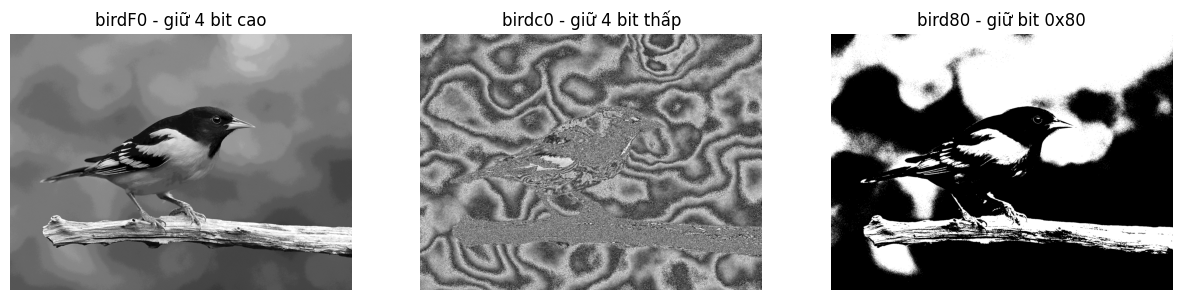

In [12]:
# 2.3 Sinh viên viết chương trình tạo ảnh mới birdc0.png và bird80.png với mức giảm intensity resolution là 0xC0 và 0x80. Xem kết quả.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
data = np.array(img).astype(np.uint8)

# Giữ 4 bit cao (xóa 4 bit thấp): 0xF0
data_F0 = data & 0xF0
Image.fromarray(data_F0).save('birdF0.png')

# Giữ 4 bit thấp (xóa 4 bit cao): 0x0F
data_c0 = data & 0x0F
Image.fromarray(data_c0).save('birdc0.png')

# Giữ bit 1000 0000: 0x80
data_80 = data & 0x80
Image.fromarray(data_80).save('bird80.png')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(data_F0, cmap='gray')
axs[0].set_title('birdF0 - giữ 4 bit cao')
axs[0].axis('off')

axs[1].imshow(data_c0, cmap='gray')
axs[1].set_title('birdc0 - giữ 4 bit thấp')
axs[1].axis('off')

axs[2].imshow(data_80, cmap='gray')
axs[2].set_title('bird80 - giữ bit 0x80')
axs[2].axis('off')

plt.show()


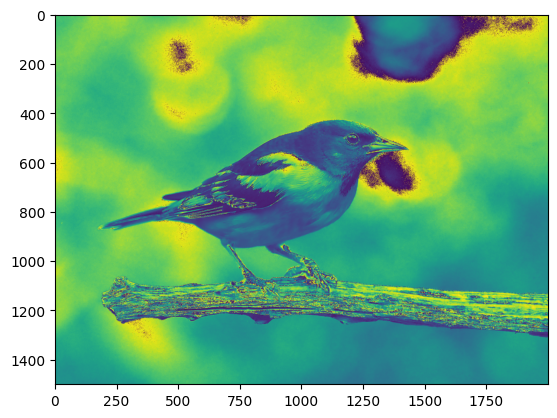

In [13]:
# 2.4 màu sắc với hệ RGB
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

data = iio.imread('bird.png')
bdata = data[:, :, 1] + data[:, :, 2]
plt.imshow(bdata)
plt.show()


In [14]:
#2.5 màu sắc với hệ  HSV
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)


(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


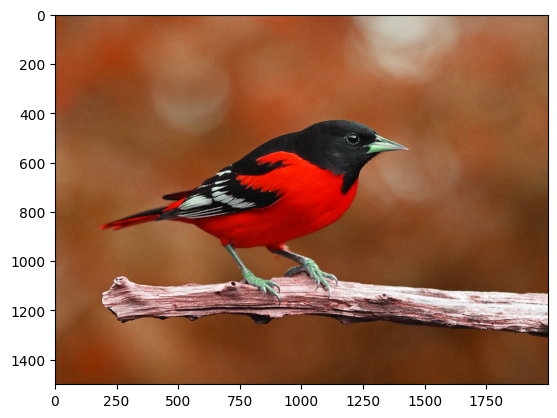

In [15]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0]/255., rgb[:,:,1]/255., rgb[:,:,2]/255.)
h = h*h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r, g, b = hsv2rgb(h, s, v)
rgb2 = np.array([r,g,b]).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()


[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


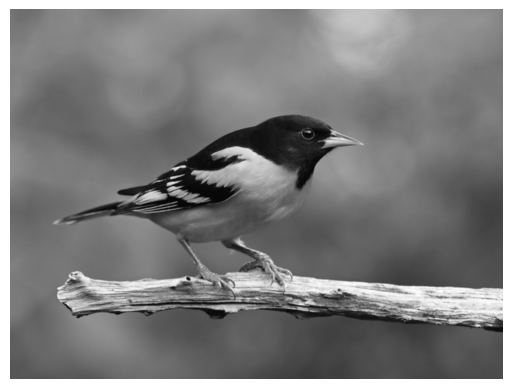

In [16]:
# 2.7 Lọc ảnh mean filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode='L')

k = np.ones((5, 5)) / 25

b = sn.convolve(a, k).astype(np.uint8)

iio.imsave('bird_mean_filter.png', b)

print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()



[[119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  81  81  81]
 [ 89  88  89 ...  81  81  81]]


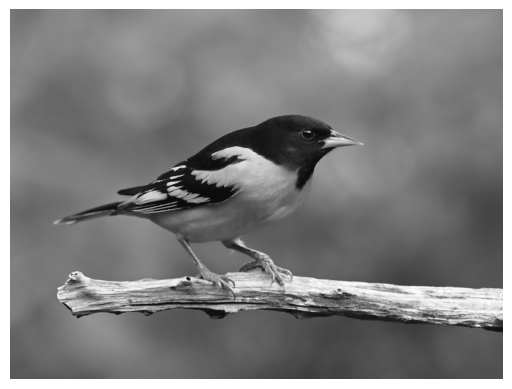

In [17]:
# với median filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode='L').astype(np.uint8)

b = sn.median_filter(
    a,
    size=5,
    footprint=None,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0
)

iio.imsave('bird_median_filter.png', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


[[122 122 122 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 ...
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]]


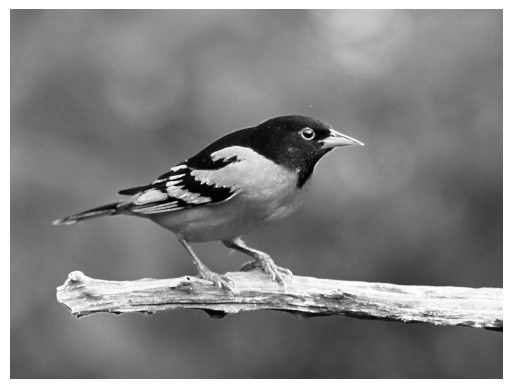

In [18]:
# với max filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode='L').astype(np.uint8)
b = sn.maximum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_max_filter.png', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


[[118 118 117 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 ...
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  78  78  78]]


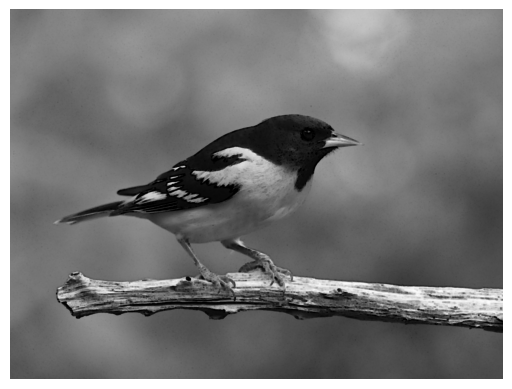

In [19]:
# với min filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode='L').astype(np.uint8)
b = sn.minimum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_min_filter.png', b)
print(b)
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()


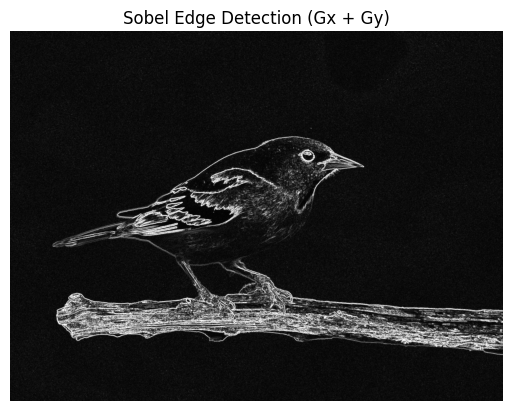

In [ ]:
# 2.8 dò cạnh biên của ảnh
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt

img = iio.imread('bird.png', mode='L').astype(np.float32)


Gx = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

Gy = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

edge_x = sn.convolve(img, Gx)
edge_y = sn.convolve(img, Gy)

edge_mag = np.sqrt(edge_x**2 + edge_y**2)
edge_mag = np.clip(edge_mag, 0, 255).astype(np.uint8)

iio.imsave('bird_sobel_manual_edge.png', edge_mag)
plt.imshow(edge_mag, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection (Gx + Gy)")
plt.show()


Saving bird.png to bird (4).png


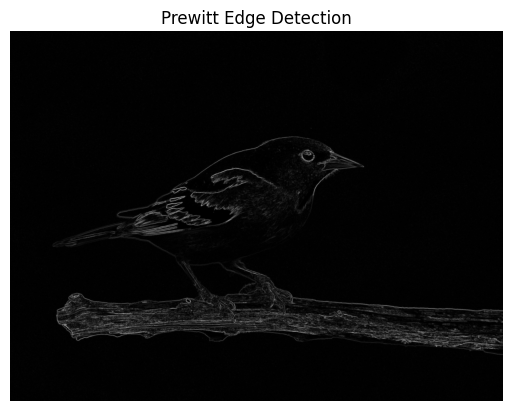

In [ ]:
# xác định biên của đối tượng trên first derivative sdụng prewitt filter
!pip install scikit-image imageio --quiet
import numpy as np
import imageio.v2 as iio
from skimage import filters, color
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

a = iio.imread('bird.png')
gray = color.rgb2gray(a)
edges = filters.prewitt(gray)
edges_uint8 = (edges * 255).astype(np.uint8)
iio.imsave('bird_prewitt_filter_edge_detection.png', edges_uint8)

plt.imshow(edges_uint8, cmap='gray')
plt.axis('off')
plt.title('Prewitt Edge Detection')
plt.show()


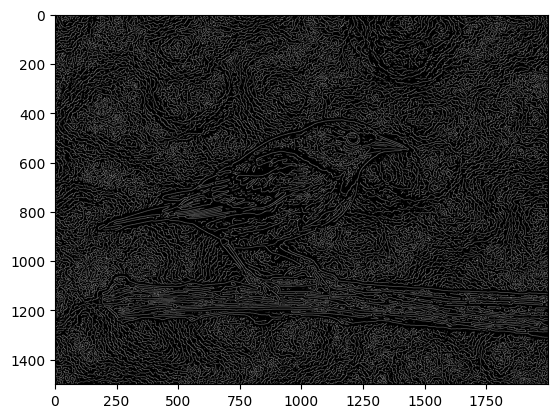

In [ ]:
# xác định biên của đối tượng trên first derivative sdụng canny filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys

a = iio.imread('bird.png', mode='F')
b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imsave('bird_canny_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')
plt.show()


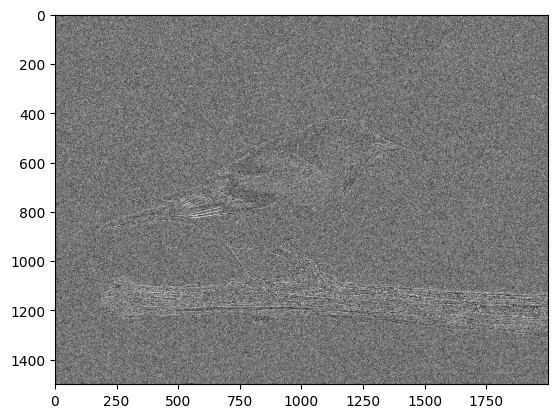

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# mở ảnh và chuyển sang grayscale
a = iio.imread('bird.png', mode='F')  # mode='F' sẽ trả ảnh grayscale float
b = sn.laplace(a, mode='reflect').astype(np.uint8)

iio.imsave('bird_laplace_filter_edge_detection.png', b)
plt.imshow(b, cmap='gray')  # thêm cmap='gray' để hiển thị đúng ảnh xám
plt.show()

Saving bird.png to bird (7).png


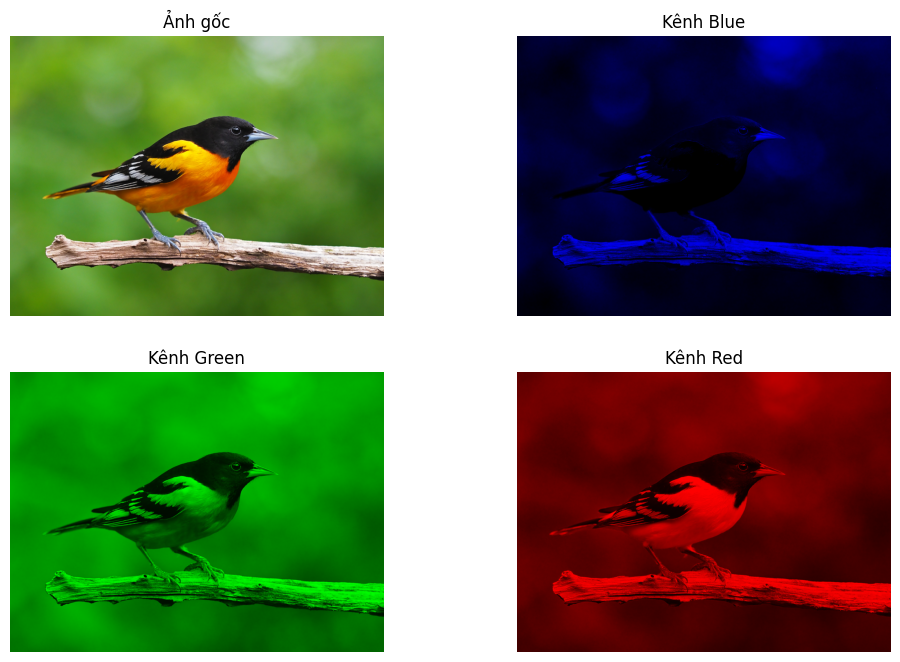

In [62]:
# BÀI TẬP 1
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

# Tách và giữ kênh Blue
b = img.copy()
b[:, :, 1] = 0
b[:, :, 2] = 0

# Tách và giữ kênh Green
g = img.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0

# Tách và giữ kênh Red
r = img.copy()
r[:, :, 0] = 0
r[:, :, 1] = 0

# Lưu ảnh
cv2.imwrite('blue.jpg', b)
cv2.imwrite('green.jpg', g)
cv2.imwrite('red.jpg', r)

def show_img(img_bgr, title):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
show_img(img, "Ảnh gốc")
plt.subplot(2,2,2)
show_img(b, "Kênh Blue")
plt.subplot(2,2,3)
show_img(g, "Kênh Green")
plt.subplot(2,2,4)
show_img(r, "Kênh Red")
plt.show()


Saving bird.png to bird (8).png


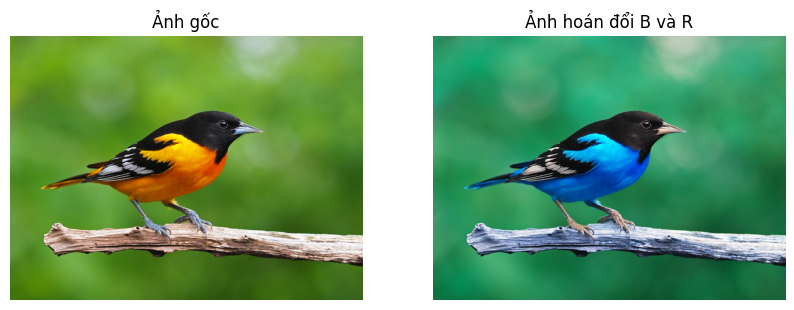

In [63]:
# BÀI TẬP 2
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

# Hoán đổi kênh B và R
img_swap = img.copy()
img_swap[:, :, [0, 2]] = img_swap[:, :, [2, 0]]

cv2.imwrite('swapped.jpg', img_swap)

def show_img(img_bgr, title):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(img, "Ảnh gốc")
plt.subplot(1,2,2)
show_img(img_swap, "Ảnh hoán đổi B và R")
plt.show()




Saving bird.png to bird (9).png


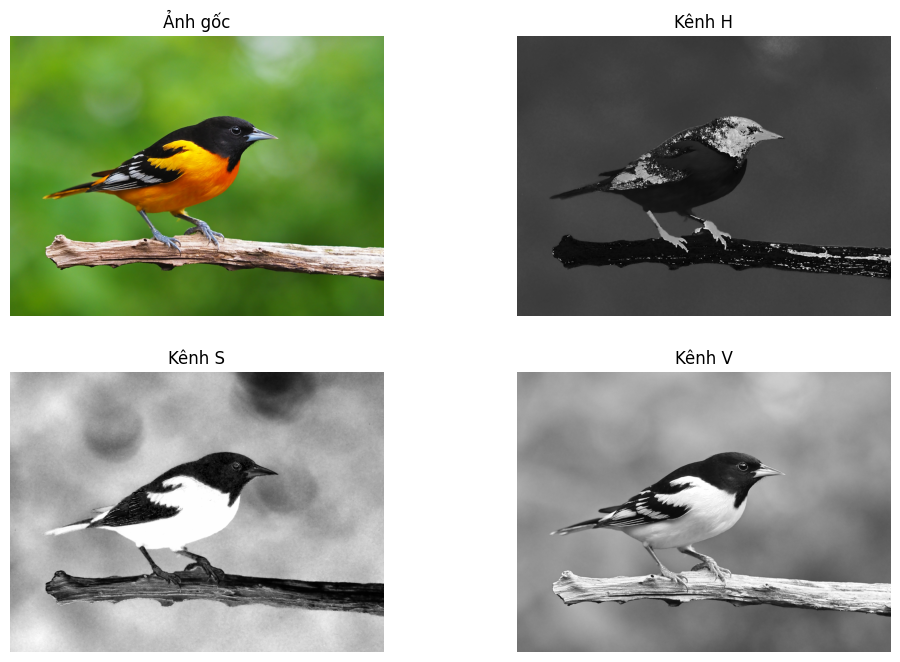

In [64]:
# BÀI TẬP 3
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imwrite('H_channel.jpg', h)
cv2.imwrite('S_channel.jpg', s)
cv2.imwrite('V_channel.jpg', v)

def show_gray(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(2,2,2)
show_gray(h, "Kênh H")

plt.subplot(2,2,3)
show_gray(s, "Kênh S")

plt.subplot(2,2,4)
show_gray(v, "Kênh V")

plt.show()

Saving bird.png to bird (10).png


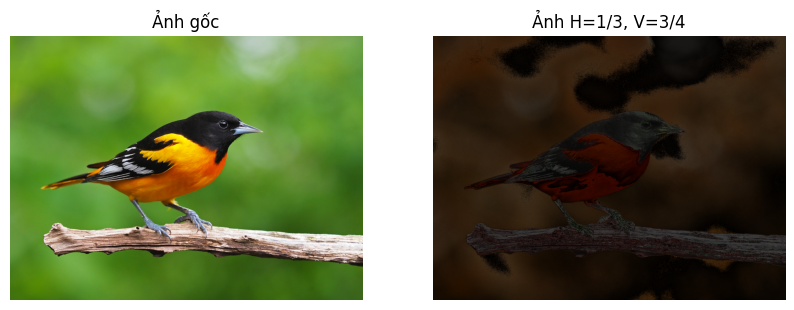

In [65]:
# BÀI TẬP 4
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h_new = (h / 3).astype(np.uint8)
v_new = (v * 3 / 4).astype(np.uint8)

hsv_new = cv2.merge([h_new, s, v_new])
img_new = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2BGR)

cv2.imwrite('hsv_modified.jpg', img_new)

def show_img(img_bgr, title):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(img, "Ảnh gốc")
plt.subplot(1,2,2)
show_img(img_new, "Ảnh H=1/3, V=3/4")
plt.show()


Saving baby.jpeg to baby (2).jpeg


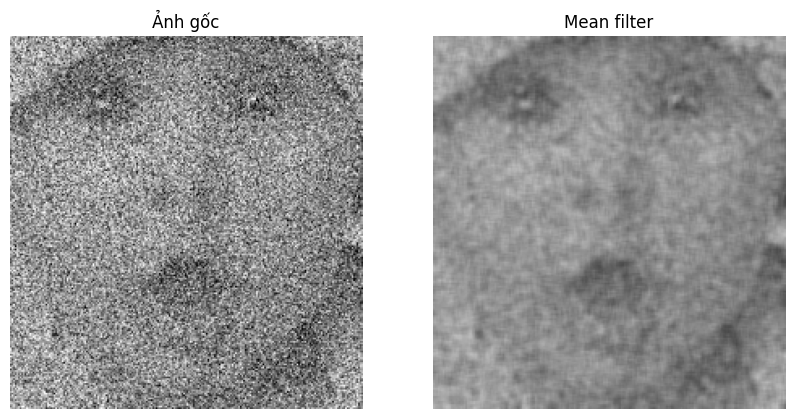

In [66]:
# BÀI TẬP 5
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)
filtered = cv2.blur(img, (5,5))
cv2.imwrite('filtered.jpg', filtered)

def show_img(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(img, 'Ảnh gốc')
plt.subplot(1,2,2)
show_img(filtered, 'Mean filter')
plt.show()



Saving balloons_noisy.png to balloons_noisy (1).png


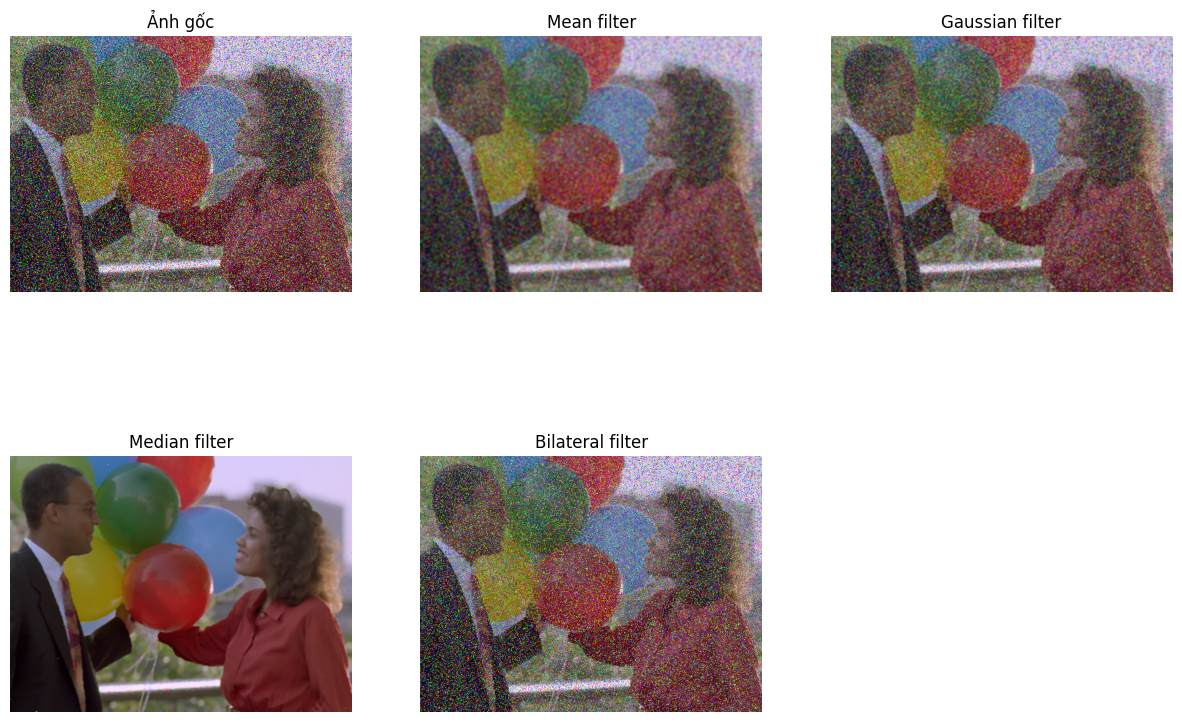

In [67]:
# BÀI TẬP 6
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)

mean_filtered = cv2.blur(img, (5,5))
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 0)
median_filtered = cv2.medianBlur(img, 5)
bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)

def show_img(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
show_img(img, 'Ảnh gốc')

plt.subplot(2,3,2)
show_img(mean_filtered, 'Mean filter')

plt.subplot(2,3,3)
show_img(gaussian_filtered, 'Gaussian filter')

plt.subplot(2,3,4)
show_img(median_filtered, 'Median filter')

plt.subplot(2,3,5)
show_img(bilateral_filtered, 'Bilateral filter')

plt.show()

Saving bird.png to bird (11).png


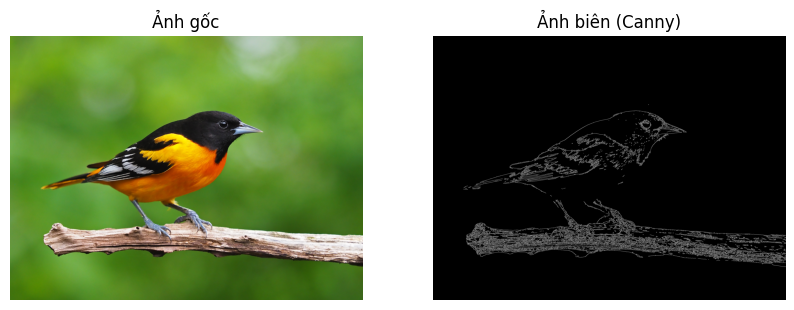

In [69]:
# BÀI TẬP 7
import cv2
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img_gray, 100, 200)

def show_img(img, title, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
img_color = cv2.imread(filename)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
show_img(img_rgb, 'Ảnh gốc')

plt.subplot(1,2,2)
show_img(edges, 'Ảnh biên (Canny)', cmap='gray')

plt.show()


Saving bird.png to bird (15).png


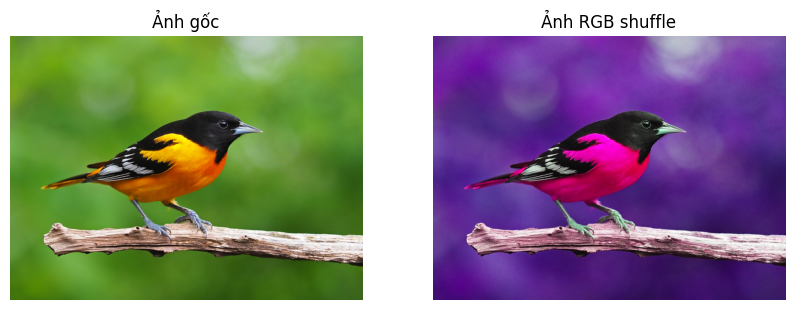

In [73]:
# BÀI TẬP 8
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import random

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)
channels = list(cv2.split(img))  # Chuyển tuple sang list để shuffle
random.shuffle(channels)
img_shuffled = cv2.merge(channels)

def show_img(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(img, 'Ảnh gốc')
plt.subplot(1,2,2)
show_img(img_shuffled, 'Ảnh RGB shuffle')
plt.show()


Saving bird.png to bird (13).png


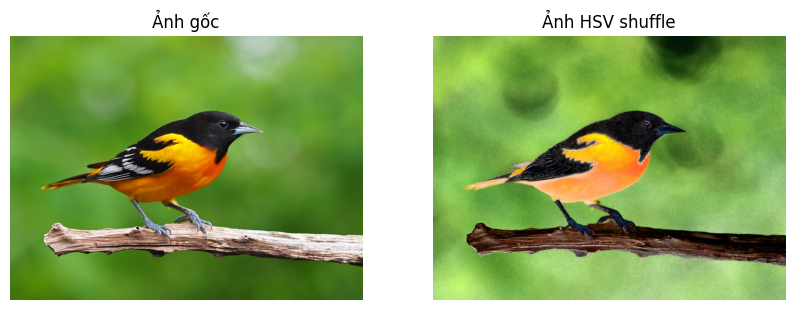

In [71]:
# BÀI TẬP 9
import cv2
from google.colab import files
import matplotlib.pyplot as plt
import random

uploaded = files.upload()
filename = list(uploaded.keys())[0]

img = cv2.imread(filename)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
channels = cv2.split(hsv)

# Tạo một permutation của [0,1,2] khác với thứ tự ban đầu
orig_order = [0,1,2]
while True:
    shuffled_order = orig_order.copy()
    random.shuffle(shuffled_order)
    if shuffled_order != orig_order:
        break

shuffled_channels = [channels[i] for i in shuffled_order]
hsv_shuffled = cv2.merge(shuffled_channels)
img_shuffled = cv2.cvtColor(hsv_shuffled, cv2.COLOR_HSV2BGR)

def show_img(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
show_img(img, 'Ảnh gốc')
plt.subplot(1,2,2)
show_img(img_shuffled, 'Ảnh HSV shuffle')
plt.show()